# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [4]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [6]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [9]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
df_clean = spaceship.dropna()

In [15]:
df_clean.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [17]:
df_clean["RoomService"].nunique()

1093

In [19]:
df_clean.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [21]:
df_clean["RoomService"].value_counts()

RoomService
0.0       4318
1.0         93
2.0         60
3.0         43
4.0         35
          ... 
378.0        1
1065.0       1
260.0        1
1633.0       1
745.0        1
Name: count, Length: 1093, dtype: int64

In [23]:
# Drop multiple columns
df_clean = df_clean.drop(columns=["PassengerId", "Name"], axis=1)

In [25]:
# Apply one-hot encoding to categorical columns
df_clean = pd.get_dummies(df_clean, columns=["HomePlanet", "Cabin", "Destination"])
df_clean

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Cabin_G/994/S,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,...,False,False,False,False,False,False,False,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,False,...,False,False,False,False,False,False,False,True,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,True,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,True,...,False,False,False,False,False,False,False,False,False,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [27]:
df_clean.corr()["RoomService"].sort_values(ascending=False)

RoomService                  1.000000
HomePlanet_Mars              0.266348
Cabin_E/344/P                0.185005
Cabin_C/309/P                0.159554
Cabin_F/299/S                0.132577
                               ...   
Destination_PSO J318.5-22   -0.061899
HomePlanet_Europa           -0.084779
HomePlanet_Earth            -0.142515
Transported                 -0.247291
CryoSleep                   -0.255398
Name: RoomService, Length: 5320, dtype: float64

In [81]:
#Feature Selection - keep only useful features

features = df_clean[["HomePlanet_Mars", "CryoSleep", "Cabin_E/344/P", 
    "Cabin_C/309/P", "Cabin_F/299/S", "Transported"]]
target = df_clean["RoomService"]

In [83]:
# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [85]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [87]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [89]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,HomePlanet_Mars,CryoSleep,Cabin_E/344/P,Cabin_C/309/P,Cabin_F/299/S,Transported
0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0


In [91]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,HomePlanet_Mars,CryoSleep,Cabin_E/344/P,Cabin_C/309/P,Cabin_F/299/S,Transported
0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [94]:
#Initialize the model Gradient Boosting

gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [96]:
#Training the model
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

- Evaluate your model

In [99]:
#Evaluate model
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 241.23584119788222
RMSE 585.836058443809
R2 score 0.18879480311244012


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [115]:
param_grid = {
    "n_estimators": [300, 400, 600, 800],  # Number of trees in the forest
    "max_depth": [6, 12, 20, None],  # Maximum depth of each tree (None = fully grown)
    "max_leaf_nodes": [10, 30, 50]  # Limits number of leaf nodes per tree
}

In [117]:
#n_estimators:
#More trees generally improve accuracy but slow training. Start small (50-100), then increase if needed.

#max_depth:
#Limits how deep trees grow. Shallow trees (3-5) prevent overfitting, while deeper trees (10+) capture more complex patterns.

#max_leaf_nodes:
#limits complexity by capping leaves per tree. Lower values (10-50) help reduce overfitting; higher values (100+) allow more detailed splits.

- Run Grid Search

In [120]:
# Define the model
model = GradientBoostingRegressor()

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error")
grid_search.fit(X_train_norm, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 6, 'max_leaf_nodes': 10, 'n_estimators': 400}


In [121]:
# Best parameters from Grid Search
best_model = grid_search.best_estimator_

In [122]:
best_model.fit(X_train_norm,y_train)

GradientBoostingRegressor(max_depth=6, max_leaf_nodes=10, n_estimators=400)

- Evaluate your model

In [126]:
# Make predictions
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 241.2342376936954
RMSE 585.8363233887155
R2 score 0.18879406937565268


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


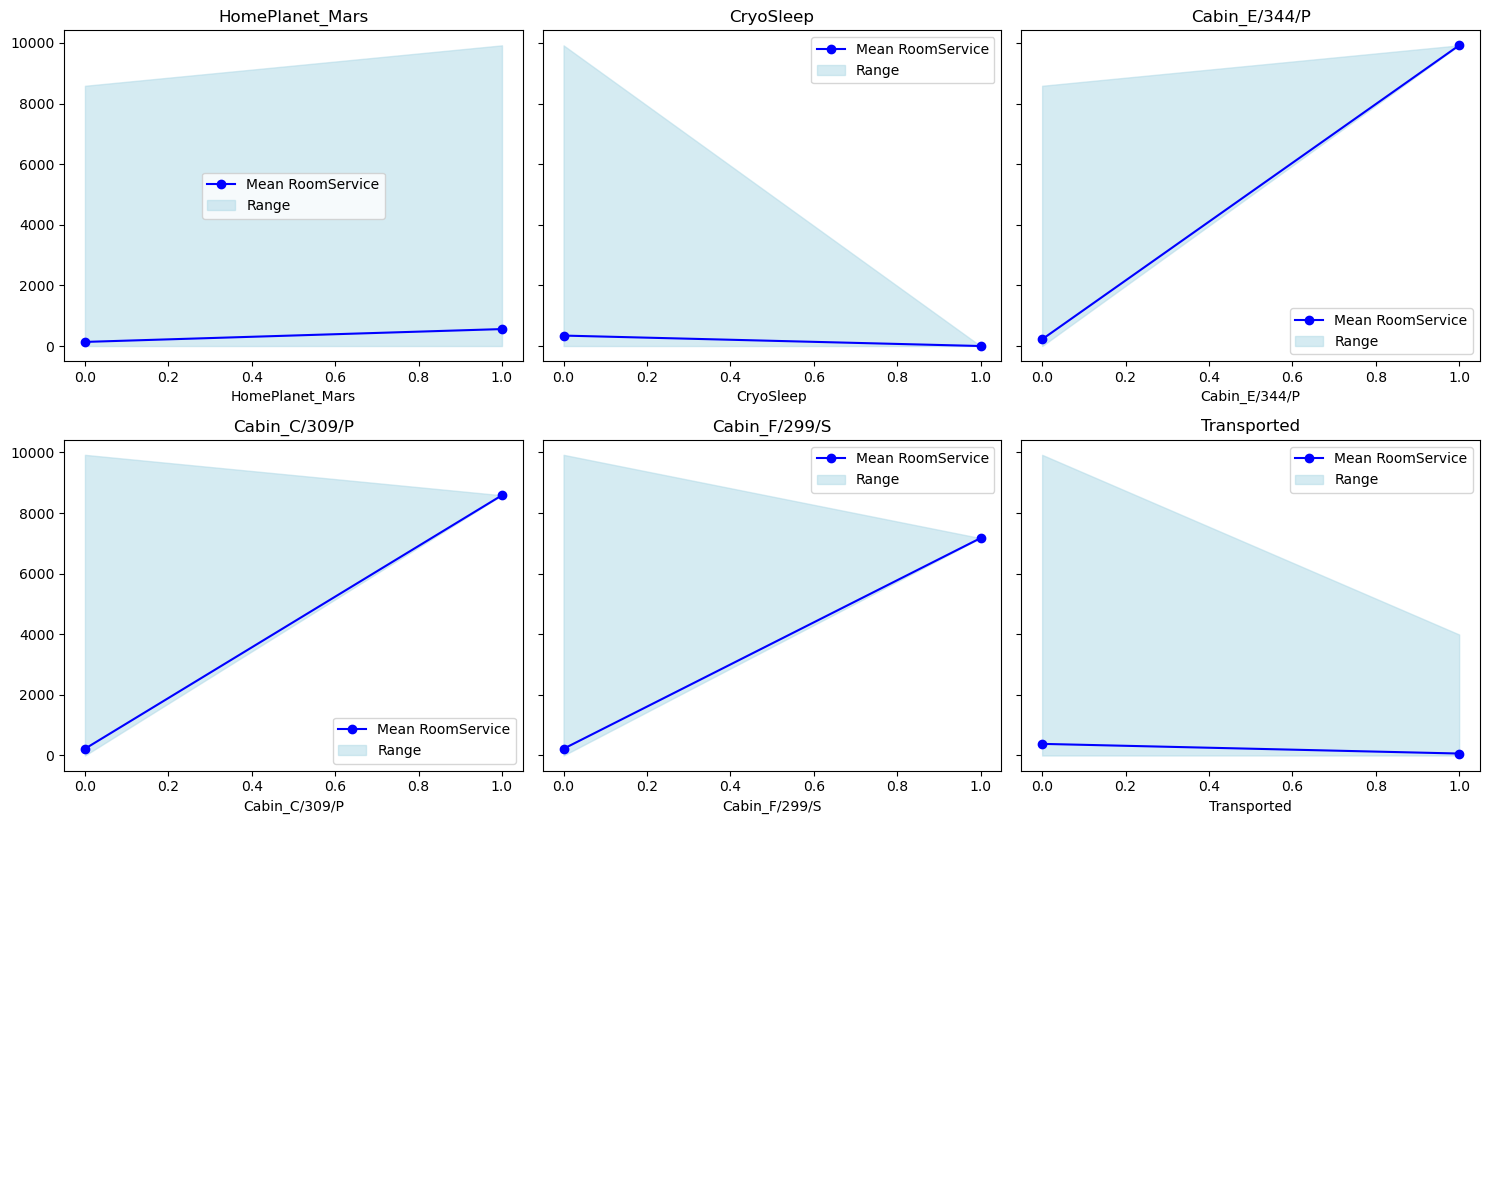

In [138]:
#create 
import matplotlib.pyplot as plt

# Define number of rows and columns
rows, cols = 3, 3  # 3 rows, 3 columns
num_features = len(features.columns)

# Create subplots with a shared y-axis
fig, axes = plt.subplots(rows, cols, figsize=(15, 12), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each feature and plot
for i, feature in enumerate(features.columns):
    grouped = df_clean.groupby(feature)["RoomService"]
    mean_values = grouped.mean()
    min_values = grouped.min()
    max_values = grouped.max()

    # Plot mean values on current subplot
    axes[i].plot(mean_values.index, mean_values, marker="o", color="blue", label="Mean RoomService")

    # Fill between min/max values
    axes[i].fill_between(mean_values.index, min_values, max_values, color="lightblue", alpha=0.5, label="Range")

    # Customize individual plot
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].legend()

# Hide any unused subplots (if features < 9)
for j in range(i+1, len(axes)):
    axes[j].axis("off")  # Turn off extra plots

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
#Key Observations:

#HomePlanet_Mars
#The mean RoomService expenditure is low for both categories (0 and 1).
#The range of expenditure widens slightly for individuals from Mars (1), suggesting more variability.

#CryoSleep
#Individuals not in CryoSleep (0) show higher variance in RoomService costs.
#Those in CryoSleep (1) tend to have low expenditures, likely because they were asleep and didn’t use services.

#Cabin_E/344/P, Cabin_C/309/P, and Cabin_F/299/S
#These plots exhibit high RoomService expenditure for those assigned to these cabins (1).
#The variance is significantly wider, meaning some individuals spent much more than others.

#Transported
#Individuals not transported (0) have a wider spending range, meaning more varied expenditures.
#Those who were transported (1) generally spent less on RoomService.

#Interpretation & Takeaways:
#Passengers in specific cabins tended to spend more on RoomService.
#CryoSleep passengers spent very little, reinforcing the idea that they were asleep for the journey.
#Transported passengers show lower spending overall, possibly indicating differences in access or spending habits.

In [ ]:
#How to Determine Which Features to Keep or Remove
#Check Correlation
#If a variable is weakly correlated with RoomService, it might not add much predictive power. 

#Look for Redundant Features
#Some features might be highly correlated with each other (multicollinearity).
#If two variables have a correlation above 0.8, consider keeping only one.

#Next Steps
#If a variable has low correlation, low importance, or little variance, it’s safe to remove. 
#You can test removing variables iteratively and check model performance.